# How to Stack using the `stacking.py` file

### Some Prerequisits:
* You have an IDL datbase (.idl file) structure saved with the data. 
* In this structure, there is a keyword of the quantity by which you want to stack

# Step 1:

Make sure that `bin_values.txt` has the quantity by which you want to stack and the bin parameters (start, stop, step_size) are specified.

# Step 2:

We have to specify the variables for the main function:

In [3]:
# Specify the directories:
final_direc = "./Example/Example_Results/"
data_direc = "./../PyStructure/Output/"
#data_direc = "./../../PhD_prep/M101_proposal/"

# As an example, we will use the databse of galaxy NGC 4321. We have only one galaxy. 
# If you have more, you can expand the list accordingly
fnames = ["ngc5194_data_struct_23as_2020_10_26.npy"]


# We will only stack by radius for now. 
# If you want more, you can expand the list accordingly
xtypes = ["rgal_kpc"]

#Define a set of lines to stack. 
lines = ["12CO21"]
prior = ["12CO10"]

weights_type = "snr_squared"
#weights_type = "INT_VAL_12CO10"

# Step 3
Loop over the list of galaxies and stacking variables and save the result

In [4]:
# import the main function:
from stacking import *

# Loop over the stacking quantities
res = get_stack(fnames,prior,lines, final_direc, dir_data = data_direc, xtype = xtypes[0], weights_type=weights_type)

[INFO]	 Stacking by rgal_kpc
[INFO]	 Weighting by SNR^2 with 12CO10
[INFO]	 Successfull Finished


# Congratulation, you have successfully run the stacking code.

If you want to see how to open and work with the resulting data, have a look at the notebook in the`Example` folder.

In [6]:
stacks_w = np.load('./Example/Example_Results/ngc5194_data_struct_23as_2020_10_26_stack_rgal_kpc__12CO_weight.npy',allow_pickle = True).item()
stacks_nw = np.load('./Example/Example_Results/ngc5194_data_struct_23as_2020_10_26_stack_rgal_kpc_no_weight.npy',allow_pickle = True).item()
stacks_snr = np.load('./Example/Example_Results/ngc5194_data_struct_23as_2020_10_26_stack_rgal_kpc.npy',allow_pickle = True).item()


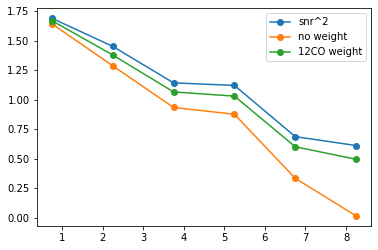

In [9]:
plt.plot(stacks_snr["xmid"],np.log10(stacks_snr["ii_K_kms_12CO10"]),"-o", label = "snr^2")
plt.plot(stacks_nw["xmid"],np.log10(stacks_nw["ii_K_kms_12CO10"]),"-o", label = "no weight")
plt.plot(stacks_w["xmid"],np.log10(stacks_w["ii_K_kms_12CO10"]),"-o", label = "12CO weight")
plt.legend()

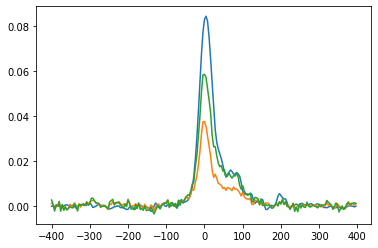

In [8]:
plt.plot(stacks_snr["vaxis_kms"],stacks_snr["12CO10_spec_K"][:,4])
plt.plot(stacks_nw["vaxis_kms"],stacks_nw["12CO21_spec_K"][:,4])
plt.plot(stacks_w["vaxis_kms"],stacks_w["12CO21_spec_K"][:,4])

In [6]:
stacks_snr["rms_K_12CO10"][0]

0.0015156353555136125

In [24]:
stacks_nw["rms_K_12CO10"][0]

0.0024349595840458607